In [6]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.csv')

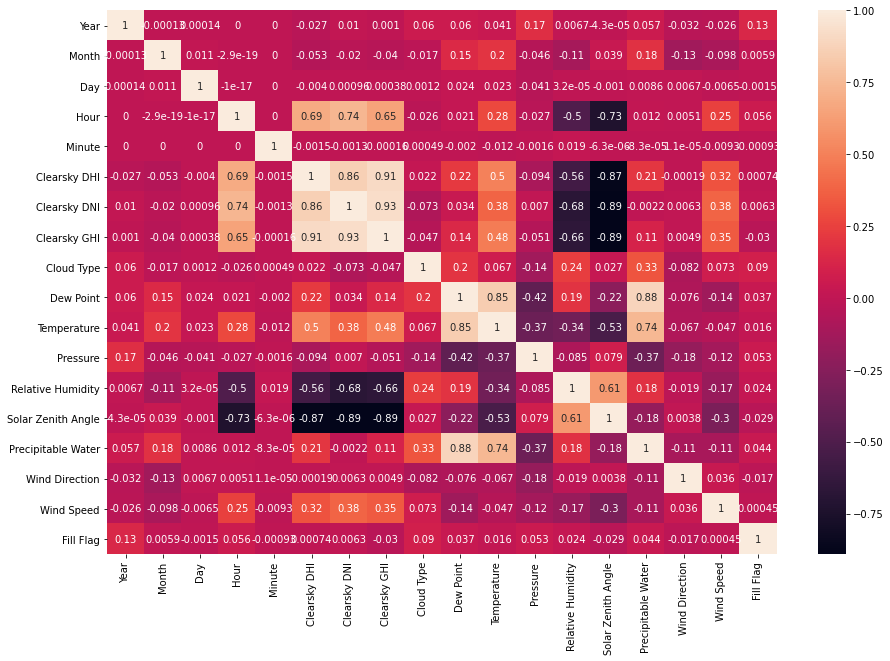

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

due point - precipitable water --> 0.88
solar zenith angle, relative humidity - hour -->-0.73, -0.5
solar zenith angle, relative humidity - dhi, dni, ghi --> -ve

In [3]:
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [4]:
df["Year"]=pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df.set_index("Year",inplace=True)

In [7]:
#adding feature cosine of solar zenith angle
df["cosSZ"]=np.cos(df['Solar Zenith Angle'])
df.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,cosSZ
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,0.787441
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,0.684167
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,0.636750
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,0.634290
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,0.677166


In [8]:
df1=df

In [9]:
X = df1.drop(columns=['Clearsky GHI','Clearsky DHI','Clearsky DNI'])
Y = df1['Clearsky DNI']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.25, random_state=101)

In [14]:
models = []
models.append(('LinearRegressor', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor(n_estimators = 500)))
models.append(('HGBR', HistGradientBoostingRegressor()))

NameError: name 'LinearRegression' is not defined

In [13]:
for text,model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    valid_pred = model.predict(x_valid)
    print(text)
    print(f"Score = {model.score(x_train,y_train)}\tTrain MSE = {mean_squared_error(train_pred, y_train)}")
    print(f"Val Score = {model.score(x_valid,y_valid)}\t Val MSE = {mean_squared_error(valid_pred, y_valid)}")
    print()

Score = 0.9999999999966253	Train MSE = 4.6142144334890145e-07
Val Score = 0.9927637925213938	 Val MSE = 994.9648454420411
